In [1]:
import pandas as pd
import numpy as np
import decimal
import json 

In [2]:
#Dataset

In [2]:
tmdb_1 = pd.read_csv('tmdb_5000_movies.csv')
tmdb = tmdb_1.rename(columns={ tmdb_1.columns[3]: 'movie_id' })
tmdb.head()

,budget,genres,homepage,movie_id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [3]:
tmdb_2 = pd.read_csv('tmdb_5000_credits.csv')
tmdb_2.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [5]:
def read_json(df,column):
    x = df[column].apply(pd.read_json)
    for i in range(len(df)):
        x[i]['movie_id'] = df['movie_id'][i] 
        x[i]['title'] = df['title'][i]
    new_df = pd.concat(x.values).reset_index()
    return new_df

In [6]:
cast = read_json(tmdb_2,'cast')
crew = read_json(tmdb_2,'crew')
language = read_json(tmdb,'spoken_languages')
generes = read_json(tmdb,'genres')
keyword = read_json(tmdb,'keywords')
companies = read_json(tmdb,'production_companies')
countries = read_json(tmdb,'production_countries')

### 1. For each movie compute the number of cast members

In [7]:
number_cast = cast.groupby(['movie_id','title'])['order'].size().to_frame().reset_index()
number_cast.rename_axis({'order':'number_cast'},axis =1, inplace=True)
number_cast.head()

,movie_id,title,number_cast
0,5,Four Rooms,24
1,11,Star Wars,106
2,12,Finding Nemo,24
3,13,Forrest Gump,66
4,14,American Beauty,40


### 2. How many movies do not have a homepage?

In [8]:
no_homepage = tmdb[tmdb['homepage'].isnull()][['homepage', 'title']]
no_homepage.head()

,homepage,title
15,NaN,The Chronicles of Narnia: Prince Caspian
24,NaN,King Kong
27,NaN,Battleship
33,NaN,X-Men: The Last Stand
34,NaN,Monsters University


In [9]:
print('Number of movies without homepage:',len(no_homepage))

Number of movies without homepage: 3091


### 3. For each year, how many movies do not have a homepage?

In [10]:
tmdb['year'] = tmdb['release_date'].str.split('-').str[0]
tmdb[0:2]

,budget,genres,homepage,movie_id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,year
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,2009
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,2007


In [11]:
no_homepage_year = no_homepage.merge(right = tmdb[['year', 'title']], on='title')
without_homepage_year = no_homepage_year.groupby(['year'])['title'].size().to_frame().reset_index()
without_homepage_year.columns = ['year', 'number_movie']
without_homepage_year.head()

,year,number_movie
0,1916,1
1,1925,1
2,1927,1
3,1929,2
4,1930,1


### 4.	Extract the domain of each homepage.

In [46]:
tmdb['homepage'].iloc[3730]

'http://www.cargoderfilm.ch http://cargothemovie.com'

In [49]:
tmdb['site'] = tmdb['homepage'].str.split('//').str[1].str.split('/').str[0]
tmdb['site2'] = tmdb['homepage'].str.split(' ').str[1]
tmdb['dominio2'] = tmdb['site2'].str.split('.').str[-1]
tmdb['dominio'] = tmdb['site'].str.split('.').str[-1]
tmdb[['dominio','dominio2','homepage']].head()

,dominio,dominio2,homepage
0,com,NaN,http://www.avatarmovie.com/
1,com,NaN,http://disney.go.com/disneypictures/pirates/
2,com,NaN,http://www.sonypictures.com/movies/spectre/
3,com,NaN,http://www.thedarkknightrises.com/
4,com,NaN,http://movies.disney.com/john-carter


### 5.	Extract a set of normalized tables. That is, each entry of a normalized table must contain exactly one   value (not a list or a dictionary). 

In [13]:
cast_table = cast.set_index('credit_id', verify_integrity=True)
cast_table.head()

,index,cast_id,character,gender,id,movie_id,name,order,title
credit_id,,,,,,,,,
5602a8a7c3a3685532001c9a,0.0,242.0,Jake Sully,2.0,65731.0,19995,Sam Worthington,0.0,Avatar
52fe48009251416c750ac9cb,1.0,3.0,Neytiri,1.0,8691.0,19995,Zoe Saldana,1.0,Avatar
52fe48009251416c750aca39,2.0,25.0,Dr. Grace Augustine,1.0,10205.0,19995,Sigourney Weaver,2.0,Avatar
52fe48009251416c750ac9cf,3.0,4.0,Col. Quaritch,2.0,32747.0,19995,Stephen Lang,3.0,Avatar
52fe48009251416c750ac9d3,4.0,5.0,Trudy Chacon,1.0,17647.0,19995,Michelle Rodriguez,4.0,Avatar


In [14]:
actors = cast[['id','name']].drop_duplicates()
actors_table = actors.set_index('id', verify_integrity=True)
actors_table.head()

,name
id,
65731.0,Sam Worthington
8691.0,Zoe Saldana
10205.0,Sigourney Weaver
32747.0,Stephen Lang
17647.0,Michelle Rodriguez


In [15]:
crew_department = crew[['credit_id','department','job','name','movie_id','title']].drop_duplicates().set_index('credit_id',verify_integrity = True)
crew_department.head()

,department,job,name,movie_id,title
credit_id,,,,,
52fe48009251416c750aca23,Editing,Editor,Stephen E. Rivkin,19995,Avatar
539c47ecc3a36810e3001f87,Art,Production Design,Rick Carter,19995,Avatar
54491c89c3a3680fb4001cf7,Sound,Sound Designer,Christopher Boyes,19995,Avatar
54491cb70e0a267480001bd0,Sound,Supervising Sound Editor,Christopher Boyes,19995,Avatar
539c4a4cc3a36810c9002101,Production,Casting,Mali Finn,19995,Avatar


In [16]:
crew_id = crew[['id','name']].drop_duplicates()
crew_table = crew_id.set_index('id',verify_integrity=True)
crew_table.head()

,name
id,
1721.0,Stephen E. Rivkin
496.0,Rick Carter
900.0,Christopher Boyes
1262.0,Mali Finn
1729.0,James Horner


In [17]:
genres_table = generes.set_index(['id','movie_id'], verify_integrity=True).drop(['index'],axis =1)
genres_table.head()

,,name,title
id,movie_id,,
28.0,19995,Action,Avatar
12.0,19995,Adventure,Avatar
14.0,19995,Fantasy,Avatar
878.0,19995,Science Fiction,Avatar
12.0,285,Adventure,Pirates of the Caribbean: At World's End


In [18]:
genres = generes[['id','name']].drop_duplicates()
genres_table = genres.set_index('id', verify_integrity=True)
genres_table.head()

,name
id,
28.0,Action
12.0,Adventure
14.0,Fantasy
878.0,Science Fiction
80.0,Crime


In [19]:
language_table = language.set_index(['iso_639_1','movie_id'],verify_integrity=True).drop(['index'],axis =1)
language_table.head()

,,name,title
iso_639_1,movie_id,,
en,19995,English,Avatar
es,19995,Español,Avatar
en,285,English,Pirates of the Caribbean: At World's End
fr,206647,Français,Spectre
en,206647,English,Spectre


In [20]:
keyword_table = keyword.set_index(['id','movie_id'], verify_integrity=True).drop(['index'],axis =1)
keyword_table.head()

,,name,title
id,movie_id,,
1463.0,19995,culture clash,Avatar
2964.0,19995,future,Avatar
3386.0,19995,space war,Avatar
3388.0,19995,space colony,Avatar
3679.0,19995,society,Avatar


In [21]:
companies_table = companies[['id','name']].drop_duplicates().set_index('id')
companies_table.head()

,name
id,
289.0,Ingenious Film Partners
306.0,Twentieth Century Fox Film Corporation
444.0,Dune Entertainment
574.0,Lightstorm Entertainment
2.0,Walt Disney Pictures


In [22]:
countries_table = countries.set_index(['iso_3166_1','movie_id'],verify_integrity=True).drop(['index'],axis =1)
countries_table.head()

,,name,title
iso_3166_1,movie_id,,
US,19995,United States of America,Avatar
GB,19995,United Kingdom,Avatar
US,285,United States of America,Pirates of the Caribbean: At World's End
GB,206647,United Kingdom,Spectre
US,206647,United States of America,Spectre


### 6.	For each movie, compute the gross margin (difference between revenue and budget)

In [23]:
tmdb['margin'] = tmdb['revenue']-tmdb['budget']
tmdb[['revenue','budget','margin','title']].head()

,revenue,budget,margin,title
0,2787965087,237000000,2550965087,Avatar
1,961000000,300000000,661000000,Pirates of the Caribbean: At World's End
2,880674609,245000000,635674609,Spectre
3,1084939099,250000000,834939099,The Dark Knight Rises
4,284139100,260000000,24139100,John Carter


In [24]:
tmdb.groupby('title')['margin'].sum().to_frame().reset_index().head()

,title,margin
0,#Horror,-1500000
1,(500) Days of Summer,53222734
2,10 Cloverfield Lane,93286421
3,10 Days in a Madhouse,-1200000
4,10 Things I Hate About You,37478166


### 7.	For each movie, compute the number of crew members

In [25]:
number_crew = crew.groupby(['movie_id','title']).size().to_frame().reset_index()
number_crew.rename_axis({0:'number_crew'},axis=1,inplace=True)
number_crew.head()

,movie_id,title,number_crew
0,5,Four Rooms,88
1,11,Star Wars,20
2,12,Finding Nemo,104
3,13,Forrest Gump,93
4,14,American Beauty,109


### 8.	For each movie, compute the number of directors

In [26]:
crew_director = crew.loc[crew['job'] == 'Director']
director = crew_director.groupby(['movie_id','title'])['job'].size().reset_index()
director.rename_axis({'job':'number_director'}, axis=1,inplace=True)
director.head()

,movie_id,title,number_director
0,5,Four Rooms,4
1,11,Star Wars,1
2,12,Finding Nemo,1
3,13,Forrest Gump,1
4,14,American Beauty,1


### 9.	For each language, compute the number of movies where such language is spoken.

In [27]:
language.head()

,index,iso_639_1,movie_id,name,title
0,0.0,en,19995,English,Avatar
1,1.0,es,19995,Español,Avatar
2,0.0,en,285,English,Pirates of the Caribbean: At World's End
3,0.0,fr,206647,Français,Spectre
4,1.0,en,206647,English,Spectre


In [28]:
language = language.drop('index', axis = 1)

In [29]:
language.columns= ['lan', 'movie_id', 'language', 'title']
language_group = language.groupby(['lan','language'])['movie_id'].size().to_frame()
language_group.columns = ['number_movie']
language_group.head()

,,number_movie
lan,language,
af,Afrikaans,7
am,,1
ar,العربية,67
bg,български език,3
bm,Bamanankan,1


### 10.	For each company and each decade, compute the overall revenue

In [30]:
companies = companies.drop('index', axis=1)

In [31]:
companies.columns = ['id_companies', 'movie_id', 'companies', 'title']
companies_revenue = companies.merge(right = tmdb[['movie_id', 'revenue', 'year']], on = 'movie_id')
companies_revenue.head()

,id_companies,movie_id,companies,title,revenue,year
0,289.0,19995,Ingenious Film Partners,Avatar,2787965087,2009
1,306.0,19995,Twentieth Century Fox Film Corporation,Avatar,2787965087,2009
2,444.0,19995,Dune Entertainment,Avatar,2787965087,2009
3,574.0,19995,Lightstorm Entertainment,Avatar,2787965087,2009
4,2.0,285,Walt Disney Pictures,Pirates of the Caribbean: At World's End,961000000,2007


In [32]:
def extract_decade(date):
    year = date
    return  int(year) // 10*10

companies_revenue['decade'] = companies_revenue['year'].apply(extract_decade)
companies_revenue.head()

,id_companies,movie_id,companies,title,revenue,year,decade
0,289.0,19995,Ingenious Film Partners,Avatar,2787965087,2009,2000
1,306.0,19995,Twentieth Century Fox Film Corporation,Avatar,2787965087,2009,2000
2,444.0,19995,Dune Entertainment,Avatar,2787965087,2009,2000
3,574.0,19995,Lightstorm Entertainment,Avatar,2787965087,2009,2000
4,2.0,285,Walt Disney Pictures,Pirates of the Caribbean: At World's End,961000000,2007,2000


In [33]:
revenue_overall = companies_revenue.groupby(['decade', 'companies'], as_index= 'decade')['revenue'].sum().to_frame()
revenue_overall.head()

revenue
decade companies                          
1910   Triangle Film Corporation   8394751
       Wark Producing Corp.        8394751
1920   Metro-Goldwyn-Mayer (MGM)  26358000
       Nero Films                        0
       Paramount Pictures           650422

### 11.	For each decade, compute the company with maximum revenue

In [67]:
revenue_overall[revenue_overall.groupby(['decade'])['revenue'].transform(max) == revenue_overall['revenue']]

revenue
decade companies                                   
1910   Triangle Film Corporation            8394751
       Wark Producing Corp.                 8394751
1920   Metro-Goldwyn-Mayer (MGM)           26358000
1930   Metro-Goldwyn-Mayer (MGM)          400176459
       Selznick International Pictures    400176459
1940   Walt Disney Productions            351747150
1950   Metro-Goldwyn-Mayer (MGM)           73770324
1960   Eon Productions                    598134765
1970   United Artists                    1392271577
1980   Paramount Pictures                4431144486
1990   Paramount Pictures                8824732067
2000   Warner Bros.                     22897419289
2010   Universal Pictures               15521006459

In [35]:
revenue_overall.loc[revenue_overall.idxmax()]

,,revenue
decade,companies,
2000,Warner Bros.,22897419289


### 12.	In each year, how many movies have revenue smaller than the budget?

In [36]:
condition = (tmdb['revenue'] < tmdb['budget'])
budget_revenue = tmdb[condition].groupby(['year', 'title'], as_index= 'year')[['revenue','budget']].sum()
budget_revenue.head()

,,revenue,budget
year,title,,
1927,Metropolis,650422,92620000
1947,The Lady from Shanghai,0,2300000
1948,The Pirate,2956000,3700000
1954,Seven Samurai,271841,2000000
1962,The Brain That Wouldn't Die,0,62000


In [37]:
number_budget_revenue = tmdb[condition].groupby('year', as_index= 'year')['title'].size().to_frame()
number_budget_revenue.sort_values(by='title',ascending=False).head()

,title
year,
2009,78
2002,71
2011,70
2015,67
2010,65


### 13.	Distribute the revenue according to the order of appearance in a movie. Assume that the i-th actor contributes twice as much as the (i+1)-th actor to the revenue.

In [50]:
df_quote = cast.merge(right=tmdb[['movie_id', 'revenue']], on = 'movie_id')
df_quote['order'] = df_quote['order'].astype(int)
df_quote[0:3]

,index,cast_id,character,credit_id,gender,id,movie_id,name,order,title,revenue
0,0.0,242.0,Jake Sully,5602a8a7c3a3685532001c9a,2.0,65731.0,19995,Sam Worthington,0,Avatar,2787965087
1,1.0,3.0,Neytiri,52fe48009251416c750ac9cb,1.0,8691.0,19995,Zoe Saldana,1,Avatar,2787965087
2,2.0,25.0,Dr. Grace Augustine,52fe48009251416c750aca39,1.0,10205.0,19995,Sigourney Weaver,2,Avatar,2787965087


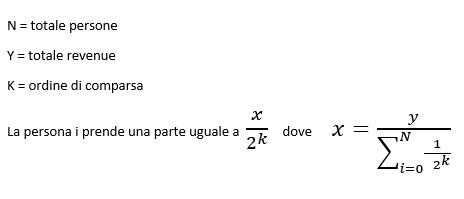

In [40]:
from PIL import Image 
img = Image.open('immagine.JPG')
img 

In [51]:
#Compute X
def assign_part_1(df, order):
    #1/2^(k)
    a = [0]*len(df[order])
    for i in range(len(df[order])):
        k = df[order][i]
        a[i] = 1/(np.exp2(k))
    df['base'] = a
    #denominatore
    sommma_denominatore = df.groupby('title')['base'].sum().to_frame().reset_index()
    sommma_denominatore.columns = ['title', 'base_somma']
    new_df = df.merge(right = sommma_denominatore[['title', 'base_somma']], on = 'title')
    #quota
    new_df['quotax'] = (new_df['revenue']/new_df['base_somma'])
    return new_df

In [52]:
df_quote = assign_part_1(df_quote, 'order')
df_quote

,index,cast_id,character,credit_id,gender,id,movie_id,name,order,title,revenue,base,base_somma,quotax
0,0.0,242.0,Jake Sully,5602a8a7c3a3685532001c9a,2.0,65731.0,19995,Sam Worthington,0,Avatar,2787965087,1.000000e+00,2.000000,1.393983e+09
1,1.0,3.0,Neytiri,52fe48009251416c750ac9cb,1.0,8691.0,19995,Zoe Saldana,1,Avatar,2787965087,5.000000e-01,2.000000,1.393983e+09
2,2.0,25.0,Dr. Grace Augustine,52fe48009251416c750aca39,1.0,10205.0,19995,Sigourney Weaver,2,Avatar,2787965087,2.500000e-01,2.000000,1.393983e+09
3,3.0,4.0,Col. Quaritch,52fe48009251416c750ac9cf,2.0,32747.0,19995,Stephen Lang,3,Avatar,2787965087,1.250000e-01,2.000000,1.393983e+09
4,4.0,5.0,Trudy Chacon,52fe48009251416c750ac9d3,1.0,17647.0,19995,Michelle Rodriguez,4,Avatar,2787965087,6.250000e-02,2.000000,1.393983e+09
5,5.0,8.0,Selfridge,52fe48009251416c750ac9e1,2.0,1771.0,19995,Giovanni Ribisi,5,Avatar,2787965087,3.125000e-02,2.000000,1.393983e+09
6,6.0,7.0,Norm Spellman,52fe48009251416c750ac9dd,2.0,59231.0,19995,Joel David Moore,6,Avatar,2787965087,1.562500e-02,2.000000,1.393983e+09
7,7.0,9.0,Moat,52fe48009251416c750ac9e5,1.0,30485.0,19995,CCH Pounder,7,Avatar,2787965087,7.812500e-03,2.000000,1.393983e+09
8,8.0,11.0,Eytukan,52fe48009251416c750ac9ed,2.0,15853.0,19995,Wes Studi,8,Avatar,2787965087,3.906250e-03,2.000000,1.393983e+09
9,9.0,10.0,Tsu'Tey,52fe48009251416c750ac9e9,2.0,10964.0,19995,Laz Alonso,9,Avatar,2787965087,1.953125e-03,2.000000,1.393983e+09


In [53]:
#calcolo quanto prende ogni attore facendo x/(2^(i-1))
def assign_part_2(quota, order):
   
    b = [0]*len(order)
    for i in range(len(order)):
        k = order[i]
        q = quota[i]
        e_k = np.exp2(k)
        number = decimal.Decimal(q/(e_k))
        b[i] = round(number,2)
    
    return b

In [54]:
df_quote['quota_attore'] =  assign_part_2(df_quote['quotax'], df_quote['order'])
df_quote[['name','title','quota_attore','revenue']]

,name,title,quota_attore,revenue
0,Sam Worthington,Avatar,1393982543.50,2787965087
1,Zoe Saldana,Avatar,696991271.75,2787965087
2,Sigourney Weaver,Avatar,348495635.88,2787965087
3,Stephen Lang,Avatar,174247817.94,2787965087
4,Michelle Rodriguez,Avatar,87123908.97,2787965087
5,Giovanni Ribisi,Avatar,43561954.48,2787965087
6,Joel David Moore,Avatar,21780977.24,2787965087
7,CCH Pounder,Avatar,10890488.62,2787965087
8,Wes Studi,Avatar,5445244.31,2787965087
9,Laz Alonso,Avatar,2722622.16,2787965087


### 14.	For each actor find the total revenue attributed to him/her.

In [68]:
group_actor = df_quote.groupby('name')['quota_attore'].sum().to_frame().sort_values(by='quota_attore',ascending= False)
group_actor.head()

,quota_attore
name,
Tom Cruise,3977380343.58
Tom Hanks,3800199350.61
Robert Downey Jr.,3631768881.50
Johnny Depp,3519121054.88
Will Smith,3320089054.73


### 15. Find the actor that is responsible for the most overall revenue.

In [69]:
group_actor.loc[group_actor.idxmax()]

,quota_attore
name,
Tom Cruise,3977380343.58


### 16.	For each movie, compute the ratio between males and females in the cast

In [ ]:
import gender_guesser.detector as gender

In [ ]:
cast['gender'].unique()

In [ ]:
#function to make distinction btw female(1)and male(2)

def gender(x):
    if x == 1:
        return 'F'
    if x == 2:
        return 'M'
    
cast['Genere'] = cast['gender'].apply(gender)
cast.head()

In [ ]:
#cast df with gender == 0 (33798)
zero = cast.loc[cast['gender'] == 0]
zero.head()

In [ ]:
# get first_name
splitting = zero['name'].str.split()
zero['first_name'] = splitting.str[0]
zero.head()

In [ ]:
#get name gender with detector
gd = gender.Detector()
zero['Gender'] = zero['first_name'].apply(gd.get_gender)
zero.head()

In [ ]:
#M and F values
def gender_zero(x):
    if x == 'mostly_male':
        return 'M'
    if x == 'male':
        return 'M'
    if x == 'female':
        return 'F'
    if x == 'mostly_female':
        return 'F'
    if x == 'unknown':
        return None
    if x == 'andy':
        return None
    
zero['Genere'] = zero['Gender'].apply(gender_zero)
zero.head()

In [ ]:
#group gender in zero_names df and in cast df

In [ ]:
#transformed values
femmine_zero = zero.loc[zero['Genere'] == 'F']
maschi_zero = zero.loc[zero['Genere'] == 'M']
#nan values
Gender_None_zero = zero.loc[zero['Genere'].isnull()]

In [ ]:
#!= 0
femmine = cast.loc[cast['Genere'] == 'F']
maschi = cast.loc[cast['Genere']== 'M']

In [ ]:
numero_femmine_zero = femmine_zero.groupby('movie_id')['Genere'].size().to_frame().reset_index().rename(columns ={'Genere':'Numero_Femmine_zero'})
numero_maschi_zero = maschi_zero.groupby('movie_id')['Genere'].size().to_frame().reset_index().rename(columns ={'Genere':'Numero_Maschi_zero'})
numero_None_zero = Gender_None_zero.groupby('movie_id')['Genere'].size().to_frame().reset_index().rename(columns ={'Genere':'Numero_None'})
numero_None_zero.head()

In [ ]:
numero_femmine = femmine.groupby('movie_id')['Genere'].size().to_frame().reset_index().rename(columns ={'Genere':'Numero_Femmine'})
numero_maschi = maschi.groupby('movie_id')['Genere'].size().to_frame().reset_index().rename(columns ={'Genere':'Numero_Maschi'})
numero_maschi.head()

In [ ]:
#merge tabella_1 and tabella_2 vertically and groupby by gender with sum.
tabella_1 = numero_femmine.merge(right = numero_maschi[['movie_id', 'Numero_Maschi']], how = 'outer' ,on = 'movie_id')
tabella_2 = numero_femmine_zero.merge(right = numero_maschi_zero[['movie_id', 'Numero_Maschi_zero']],how = 'outer', on = 'movie_id')
tabella1 =tabella_1.fillna(0)
tabella2 = tabella_2.fillna(0)
n_Nan = numero_None_zero.fillna(0)

In [ ]:
cast_gender = tabella_1.merge(right = tabella_2, on = 'movie_id', how = 'outer')
cast_gender =tabella.merge(n_Nan,how = 'outer', on = 'movie_id')
cast_gender =tabella.fillna(0)
cast_gender.head()

In [ ]:
cast_gender['femmine'] = cast_gender['Numero_Femmine'] + cast_gender['Numero_Femmine_zero']
cast_gender['maschi'] = cast_gender['Numero_Maschi'] + cast_gender['Numero_Maschi_zero']
cast_gender['somma_cast'] = cast_gender['femmine']+cast_gender['maschi']
cast_gender['% femmine'] = (cast_gender['femmine']/cast_gender['somma_cast'])*100
cast_gender['% maschi'] = (cast_gender['maschi']/cast_gender['somma_cast'])*100
cast_gender['ratio_m/f'] = cast_gender['maschi']/cast_gender['femmine']

In [ ]:
cast_genere = cast_gender.merge(number_cast[['movie_id', 'number_cast']],how = 'left', on='movie_id')
cast_genere = cast_genere[['movie_id','Numero_None','femmine','maschi','somma_cast','% femmine','% maschi','ratio_m/f','number_cast']]
cast_genere.head()

### 17. For each movie, compute the ratio between the attributed revenue of males and females in the cast

In [ ]:
cast_uno = cast.loc[cast['gender'].isin([1,2])]
df = pd.concat([cast_uno,zero]).drop(['Gender','first_name','gender'],axis =1)
df.head()

In [ ]:
#revenue+cast
cast_merge = df.merge(right= df_quote[['movie_id', 'quota_attore','name']],on = ['movie_id','name'])
femmine_cast = cast_merge.loc[cast_merge['Genere'] == 'F'].groupby('movie_id')['quota_attore'].sum().to_frame().reset_index().rename(columns = {'quota_attore':'quota_femmine'})
maschi_cast = cast_merge.loc[cast_merge['Genere']== 'M'].groupby('movie_id')['quota_attore'].sum().to_frame().reset_index().rename(columns = {'quota_attore':'quota_maschi'})
femmine_maschi = maschi_cast.merge(femmine_cast, on = 'movie_id', how = 'outer')
femmine_maschi['quota_maschi'] = femmine_maschi['quota_maschi'].astype(float)
femmine_maschi['quota_femmine'] = femmine_maschi['quota_femmine'].astype(float)
maschi_cast.head()

In [ ]:
femmine_maschi['ratio_m/f'] = round(femmine_maschi['quota_maschi']/femmine_maschi['quota_femmine'],2).astype(float)
femmine_maschi['ratio_f/m'] = round(femmine_maschi['quota_femmine']/femmine_maschi['quota_maschi'],2).astype(float)
femmine_maschi.head()

### 18.	For each director, compute the average (among all movies he/she has directed) of the ratio found in the previous point.

In [ ]:
directors_revenue = crew_director.merge(femmine_maschi,on = 'movie_id',how = 'left').fillna(0)
director_ratio = directors_revenue.groupby(['name'])['ratio_m/f','ratio_f/m'].mean()
director_ratio.head()

### 19.	Find the director that has the highest average computed in the previous point.

In [ ]:
director_ratio.loc[director_ratio.idxmax()]